### 조건1

In [8]:
# # 모듈 로딩
# import os
# import random
# import time

# import cv2
# import img_preprocess
# import matplotlib.pyplot as plt
# import model3_hs
# import numpy as np


# # 이미지 전처리
# def preprocess_img(img):

#     # img = cv2.imread(ip[0])
#     img = img_preprocess.find_contours(img, show=False)
#     if np.any(img) == None:
#         return [], []
#     else:
#         img
#     # 그레이스케일화
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # 이미지 스무딩
#     img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)

#     return img, img_gray


# def preprocess_tem():

#     template_h = "./tem_images/new3_tem_h_5.jpg"
#     template_v = "./tem_images/new3_tem_v_5.jpg"
#     # template_h = "./tem_images/ng_tem_h_5.jpg"
#     # template_v = "./tem_images/ng_tem_v_5.jpg"
#     # template_v2 = "./lginnotek_images/tem_images/new_tem_v_3.jpg"
#     # template_v3 = "./lginnotek_images/tem_images/new2_tem_v_3.jpg"

#     # img = cv2.imread(ip[0])
#     template_h = cv2.imread(template_h)  # 가로면 템플릿
#     template_v = cv2.imread(template_v)  # 세로면 템플릿
#     # template_v2 = cv2.imread(template_v2)  # 세로면 템플릿
#     # template_v3 = cv2.imread(template_v3)  # 세로면 템플릿

#     # 그레이스케일화
#     template_h = cv2.cvtColor(template_h, cv2.COLOR_BGR2GRAY)
#     template_v = cv2.cvtColor(template_v, cv2.COLOR_BGR2GRAY)
#     # template_v2 = cv2.cvtColor(template_v2, cv2.COLOR_BGR2GRAY)
#     # template_v3 = cv2.cvtColor(template_v3, cv2.COLOR_BGR2GRAY)

#     return template_h, template_v


# # 노출된 bump 검출 코드
# def match_template(img, img_gray, template_h, template_v):
#     # 템플릿 사이즈를 변수에 저장
#     w, h = template_h.shape[::-1]
#     w2, h2 = template_v.shape[::-1]
#     # w3, h3 = template_v2.shape[::-1]
#     # w4, h4 = template_v3.shape[::-1]

#     # 템플릿 매칭
#     # TM_CCOEFF_NORMED : 최소값이 아닌 최대값을 가져와야하기 때문에 사용함, 즉 하나가 아닌 여러개 찾기 위함
#     res_h = cv2.matchTemplate(img_gray, template_h, cv2.TM_CCOEFF_NORMED)  # 가로 체크
#     res_v = cv2.matchTemplate(img_gray, template_v, cv2.TM_CCOEFF_NORMED)  # 세로 체크
#     # res_v2 = cv2.matchTemplate(img_gray, template_v2, cv2.TM_CCOEFF_NORMED)  # 세로 체크
#     # res_v3 = cv2.matchTemplate(img_gray, template_v3, cv2.TM_CCOEFF_NORMED)  # 세로 체크
#     threshold = 0.92  # 0 ~ 1의 값, 높을수록 정확한 결과

#     # 가로, 세로면 각각 불량 탐색
#     # 가로면에서 불량 탐색
#     # cnt = 0
#     cnt_h = 0
#     cnt_v = 0
#     # cnt_v2 = 0
#     # cnt_v3 = 0
#     if np.where(res_h >= threshold):
#         loc = np.where(res_h >= threshold)  # res_h 중 threshold보다 큰 값 위치 저장
#         for pt in zip(*loc[::-1]):
#             # 결과값에 사각형 그리기
#             cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h + 10), (0, 0, 255), 1)
#             cnt_h += 1
#     # 세로면에서 불량 탐색
#     if np.where(res_v >= threshold):
#         loc = np.where(res_v >= threshold)  # res_v 중 threshold보다 큰 값 위치 저장
#         for pt in zip(*loc[::-1]):
#             # 결과값에 사각형 그리기
#             cv2.rectangle(img, pt, (pt[0] + w2 + 5, pt[1] + h2 + 10), (0, 0, 255), 1)
#             cnt_v += 1

#     # if np.where(res_v2 >= threshold):
#     #     loc = np.where(res_v2 >= threshold)  # res_v 중 threshold보다 큰 값 위치 저장
#     #     for pt in zip(*loc[::-1]):
#     #         # 결과값에 사각형 그리기
#     #         cv2.rectangle(img, pt, (pt[0] + w3 + 5, pt[1] + h3 + 10), (0, 0, 255), 1)
#     #         cnt_v2 += 1

#     # if np.where(res_v3 >= threshold):
#     #     loc = np.where(res_v3 >= threshold)  # res_v 중 threshold보다 큰 값 위치 저장
#     #     for pt in zip(*loc[::-1]):
#     #         # 결과값에 사각형 그리기
#     #         cv2.rectangle(img, pt, (pt[0] + w4 + 5, pt[1] + h4 + 10), (0, 0, 255), 1)
#     #         cnt_v3 += 1

#     cnt = cnt_h + cnt_v

#     return cnt, img


# # 이미지 불러오기


# def check_img(kind="overkill"):
#     # random.seed(time.time_ns() % 10000)
#     num_OK = 0
#     num_NG = 0
#     template_h, template_v = preprocess_tem()
#     if kind == "all":
#         paths = os.listdir("./product_images/")
#         img_paths = []
#         for p in paths:
#             file_path = "./product_images/" + p + "/"
#             img_paths = list(map(lambda x: [file_path + x, p], os.listdir(file_path)))
#             ok_path = os.mkdir(file_path + "result/ok")
#             ng_path = os.mkdir(file_path + "result/ng")
#         print(f"img_paths : {img_paths}")
#         count = 0
#         while count > len(ip):
#             ip = random.choice(img_paths)
#             img = cv2.imread(ip[0])
#             img, img_gray = preprocess_img(img)
#             cnt, img = match_template(img, img_gray, template_h, template_v)
#             if cnt >= 1:
#                 cv2.imwrite(ng_path + ip[0], img)
#                 num_NG += 1
#             else:
#                 cv2.imwrite(ok_path + ip[0], img)
#                 num_OK += 1
#             count += 1

#     else:
#         file_path = "./product_images/" + kind + "/"
#         img_paths = os.listdir(file_path)
#         ok_path = os.mkdir(file_path + "result/ok")
#         ng_path = os.mkdir(file_path + "result/ng")

#         for i in range(len(img_paths)):
#             image = cv2.imread(file_path + img_paths[i])
#             img, img_gray = preprocess_img(image)

#             if img == []:
#                 cv2.imwrite(file_path + "result/ng/" + img_paths[i], image)
#                 num_NG += 1
#             else:
#                 cnt, img = match_template(img, img_gray, template_h, template_v)

#                 if cnt >= 1:
#                     cv2.imwrite(file_path + "result/ng/" + img_paths[i], image)
#                     num_NG += 1
#                 else:
#                     cv2.imwrite(file_path + "result/ok/" + img_paths[i], image)
#                     num_OK += 1

#     return print(f"양품 수량 : {num_OK} \n불량품 수량 : {num_NG}")

In [9]:
# check_img("true_ng")

### 조건2

In [191]:
import os
import cv2
import numpy as np
import model3_hs
import img_preprocess
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

In [192]:
# PATH = "./product_images/true_ng/result/ok/"
# for i in os.listdir(PATH):
#     print(PATH + i)
#     preprocessing(PATH+i)

In [265]:
def preprocessing(imgg):
    imageA = cv2.imread('./product_images/true_ok/GSY827AN7A1356_AAO11960K_PKT10_CM1EQSUA0012_20220711210457_DirectLight_OK.jpg')
    imageB = cv2.imread(imgg)
    
    img, img1 = img_preprocess.find_contours(imageA, sensor=True)
    dif, dif1 = img_preprocess.find_contours(imageB, sensor=True)
    #dif= cv2.resize(dif, dsize=(1836, 1432))
    dif1= cv2.resize(dif1, dsize=(1676, 1258))
    
    tempDiff = cv2.subtract(img1, dif1)
    
    grayA = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(dif1, cv2.COLOR_BGR2GRAY)

    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff*255).astype("uint8")

    print(f"Similarity: {score:.5f}")

    thresh = cv2.threshold(diff, 0, 255,
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # 차이점 빨간색으로 칠하기
    tempDiff[thresh == 255] = [0, 0, 255]

    cv2.imshow("img1", cv2.resize(img1, (960, 540)))
    cv2.imshow("dif1", cv2.resize(dif1, (960, 540)))
    cv2.imshow("Gray2", cv2.resize(tempDiff, (960, 540)))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return tempDiff

In [266]:
# GSY827AN7C3501_AAO11690K_PKT12_CM1EQSUA0011_20220713001152_DirectLight_NG.jpg   (까다로운 먼지)
# GSY827BN8F0534_AAO32062K_PKT07_CM1EQSUA0012_20220815162431_DirectLight_NG.jpg   (까다로운 먼지)
# GSY848CN832941_AAO25314K_PKT15_CM1EQSUA0022_20220806165752_DirectLight_NG.jpg   (질문할 사진)
# GSY848AN7U0241_AAO14488K_PKT14_CM1EQSUA0012_20220728060237_DirectLight_NG.jpg   (까다로운 먼지)
# GSY848CN832410_AAO32159K_PKT06_CM1EQSUA0022_20220805210213_DirectLight_NG.jpg   (3번 조건)
# GSY827AN7A1641_AAO19043K_PKT06_CM1EQSUA0012_20220711220651_DirectLight_NG.jpg   (화면 깨짐)

In [267]:
preprocessing("./product_images/true_ok/GSY827AN7A1442_AAO05968K_PKT15_CM1EQSUA0012_20220711202445_DirectLight_OK.jpg")

Similarity: 0.99817


array([[[  8,   8,   8],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  7,   7,   7],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  6,   6,   6],
        [ 47,  47,  47]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [ 16,  16,  16],
        [ 25,  25,  25],
        [ 41,  41,  41]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  3,   3,   3],
        ...,
        [116, 116, 116],
        [ 69,  69,  69],
        [ 31,  31,  31]]

In [268]:
def get_hists(img, mask=None, ranges=[0, 255]):
    """show image's distribution

    Args:
        img (3D/2D Array): image
        mask (cv2.inrange, optional): image where you wanna get hist. Defaults to None.
        ranges (list, optional): _description_. Defaults to [0, 255].

    Returns:
        hists (list): list of each component's hist
    """
    colors = ["b", "g", "r"]
    img_planes = cv2.split(img)
    hists = []
    for (p, c) in zip(img_planes, colors):
        try:
            hist = cv2.calcHist(
                [p],
                [0],
                mask,
                [256],
                ranges,
            )
            hists.append([hist, c])

        except:
            pass

    return hists

Similarity: 0.99817


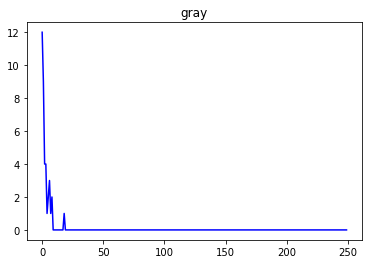

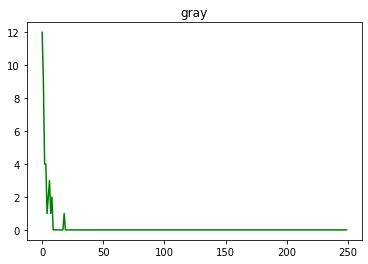

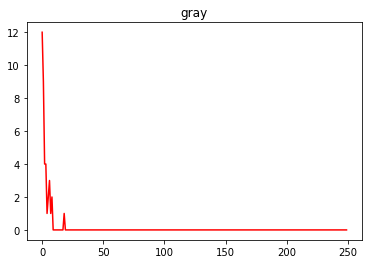

In [269]:
def make_mask(per, n):
    """ 이미지에 마진margin을 n만큼 설정해서 출력

    Args:
        per (ndarray): 이미지
        n (int): 마진margin 

    Returns:
        ndarray: 마진을 설정한 이미지
    """
    mask = np.zeros(per.shape[:2], np.uint8)
    mask[n : per.shape[0] - n, n : per.shape[1] - n] = 255
    return mask


tempdiff=preprocessing("./product_images/true_ok/GSY827AN7A1442_AAO05968K_PKT15_CM1EQSUA0012_20220711202445_DirectLight_OK.jpg")
mask = make_mask(tempdiff, 10)
hists = get_hists(tempdiff, mask=mask)
for hist, c in hists:
    plt.plot(hist[6:], color=c)
    plt.title("gray")
    plt.show()

In [270]:
hist=np.sum(hists[2][0][6:])
hist

39.0

In [246]:
# 정상
# 7 - 33/ 8 -  31/ 9 - 29/ 10 - 35/ 11 - 39/ 12 - / 13 - 

# 불량
# 7 - 34 / 8 - 26 / 9 - 398/ 10 - 40/ 11 - 40/ 12 - 125/ 13 - 54

In [221]:
def check_num(hist):
    if hist > 25:
        print("불량")
    else:
        print("정상")
        
check_num(hist)

불량


In [ ]:
# 양품, 불량 판정 기준
def defect_range(hist, file_path, name, imageB, num_OK, num_NG):
    """
    불량 검출 유무에 따라 양품, 불량 판정
    Args:
        cnt (int): _description_
        file_path (str): _description_
        name (str): _description_
        image (_type_): _description_
        num_OK (int): _description_
        num_NG (int): _description_

    Returns:
        int: _description_
    """
    if hist > 25:
        cv2.imwrite(file_path + "result/ng/" + name, imageB)
        num_NG += 1
    else:
        cv2.imwrite(file_path + "result/ok/" + name, imageB)
        num_OK += 1
    return num_OK, num_NG

In [ ]:
# def go_folder()

# PATH = "./product_images/true_ng/result/ok/"
# for i in os.listdir(PATH):
#     print(PATH + i)
#     preprocessing(PATH+i)

In [42]:
# img11 = preprocessing("./product_images/true_ng/GSY827AN7C2213_AAO20652K_PKT10_CM1EQSUA0011_20220713063204_DirectLight_NG.jpg")
# color = ('b','g','r')
# for i,col in enumerate(color):
#     histr = cv2.calcHist([img11],[i],None,[256],[0,256])
#     plt.plot(histr,color = col)
#     plt.xlim([0,256])
#     plt.show()